Download the NSW Data Files (Lalonde Sample) from the NBER (National Bureau of Economic Research) website. There are 297 treated observations and 425 control observations. You will need to use the “foreign” library to import the data into R. Familiarize yourself with the data. Practice using the “plot” function to create data visualizations of the distributions of key variables--in particular, practice creating a plot, and then adding additional information to it using the “points” and “lines” functions. Note: The visualizations can be very simple and imperfect, but please do produce some kind of figure using the data.
A brief but comprehensive tutorial for creating plots in R can be found here (but there are many others that can be Googled). Bring to class: The hyperlink to a 1-page Google Doc with your data visualization at the top of the page and the corresponding R code at the bottom of the page. Be prepared to explain, in about 30 seconds:
1. What is the message this data visualization is trying to convey?
2. Why did you choose this message? Is it useful and/or important, and if so why?
3. Was there something else you ideally wanted to show, but did not know how?

Review FA material regarding statistical power and sample size calculations. Come to class knowing the definitions of statistical power, statistical significance, alpha, and beta. Familiarize yourself with this very simple online sample size calculator.

In [33]:
library(foreign); library("cobalt"); library("WeightIt")
df = read.dta("nsw.dta")
head(df)

data_id,treat,age,education,black,hispanic,married,nodegree,re75,re78
Lalonde Sample,1,37,11,1,0,1,1,0,9930.0459
Lalonde Sample,1,22,9,0,1,0,1,0,3595.8940
Lalonde Sample,1,30,12,1,0,0,0,0,24909.4492
Lalonde Sample,1,27,11,1,0,0,1,0,7506.1460
Lalonde Sample,1,33,8,1,0,0,1,0,289.7899
Lalonde Sample,1,22,9,1,0,0,1,0,4056.4939


Call
 weightit(formula = treat ~ . - re78, data = lalonde, method = "ps", 
    estimand = "ATT")

Balance Measures
                Type Diff.Adj
prop.score  Distance  -0.0205
age          Contin.   0.1188
educ         Contin.  -0.0284
race_black    Binary  -0.0022
race_hispan   Binary   0.0002
race_white    Binary   0.0021
married_1     Binary   0.0186
nodegree_1    Binary   0.0184
re74         Contin.  -0.0021
re75         Contin.   0.0110
re78         Contin.   0.1543

Effective sample sizes
           Control Treated
Unadjusted 429.000     185
Adjusted    99.815     185

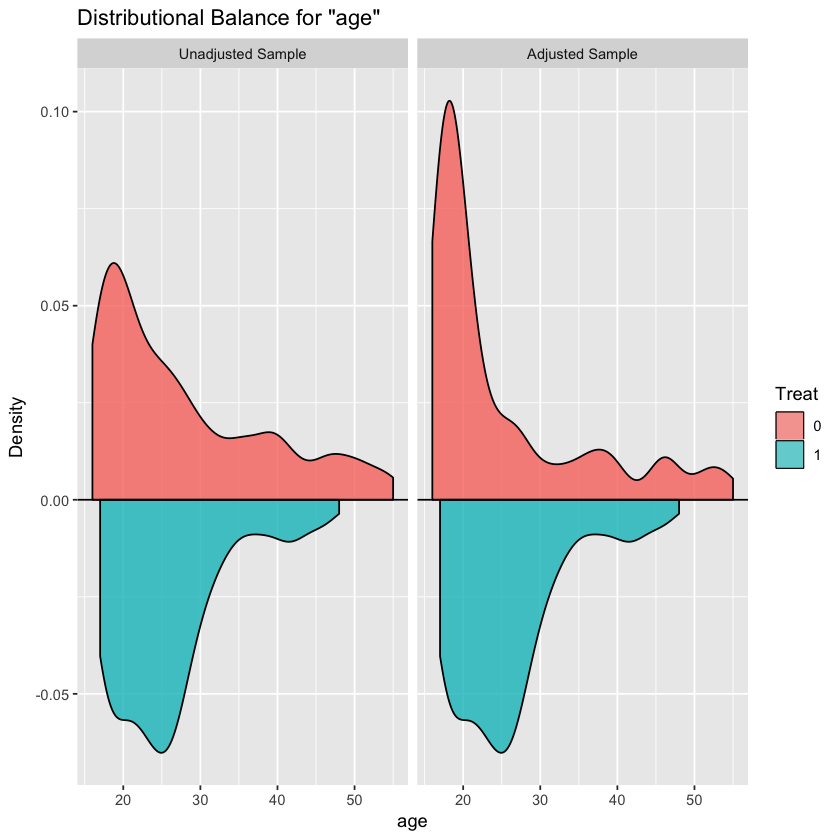

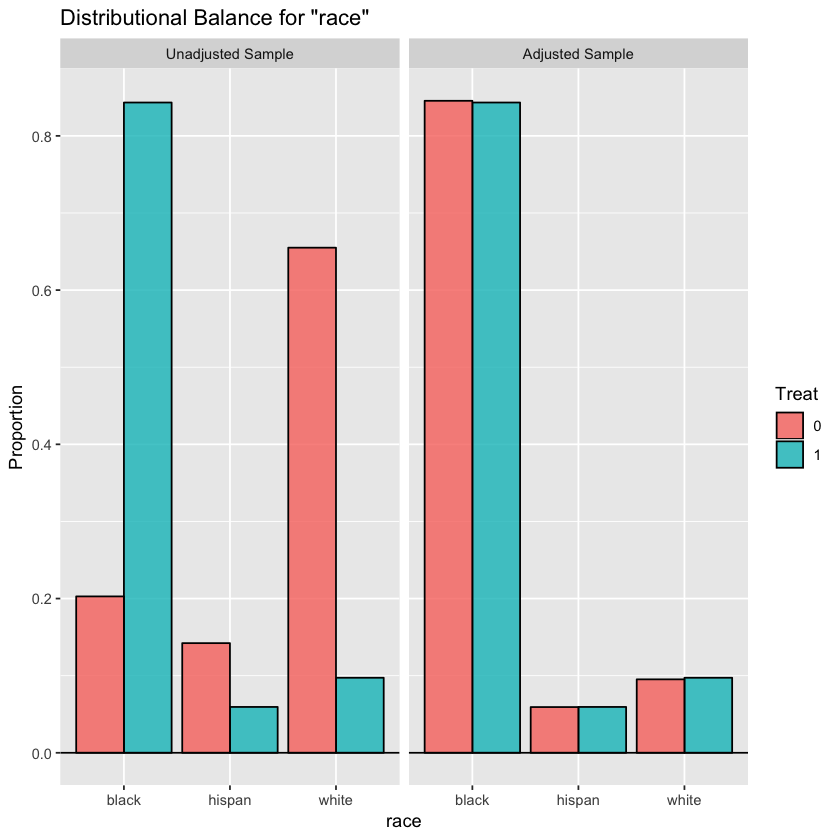

In [74]:
W.out <- weightit(treat ~ . - re78, data = lalonde, method = "ps", estimand = "ATT")
bal.tab(W.out)
bal.plot(W.out, var.name = "age", which = "both", mirror = TRUE)
bal.plot(W.out, var.name = "race", which = "both")

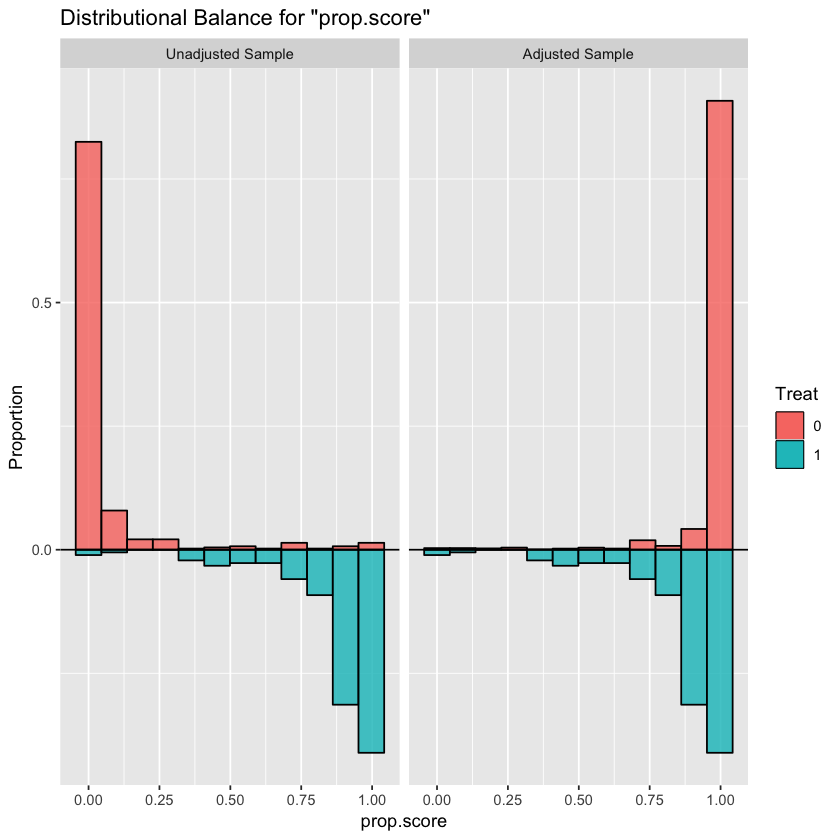

In [43]:
bal.plot(W.out, var.name = "prop.score", which = "both", type = "histogram", mirror = TRUE)

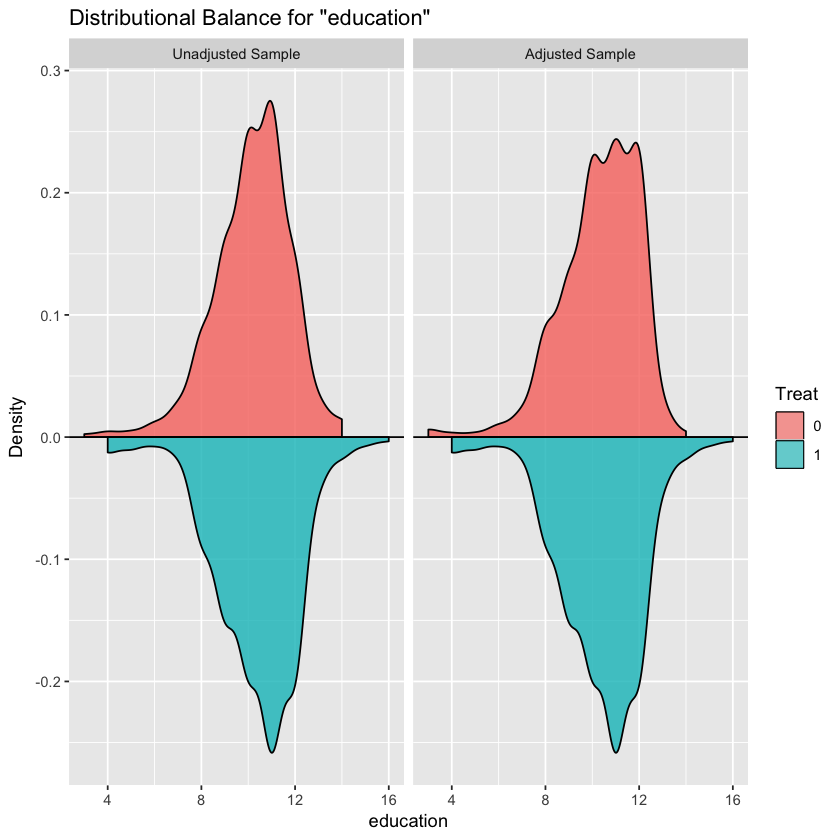

In [71]:
m.out = matchit(treat ~ age + education + black + hispanic + married + nodegree + re75, data = df, method = "nearest", replace = TRUE)

bal.plot(m.out, var.name = "education", which = "both",  mirror = TRUE)

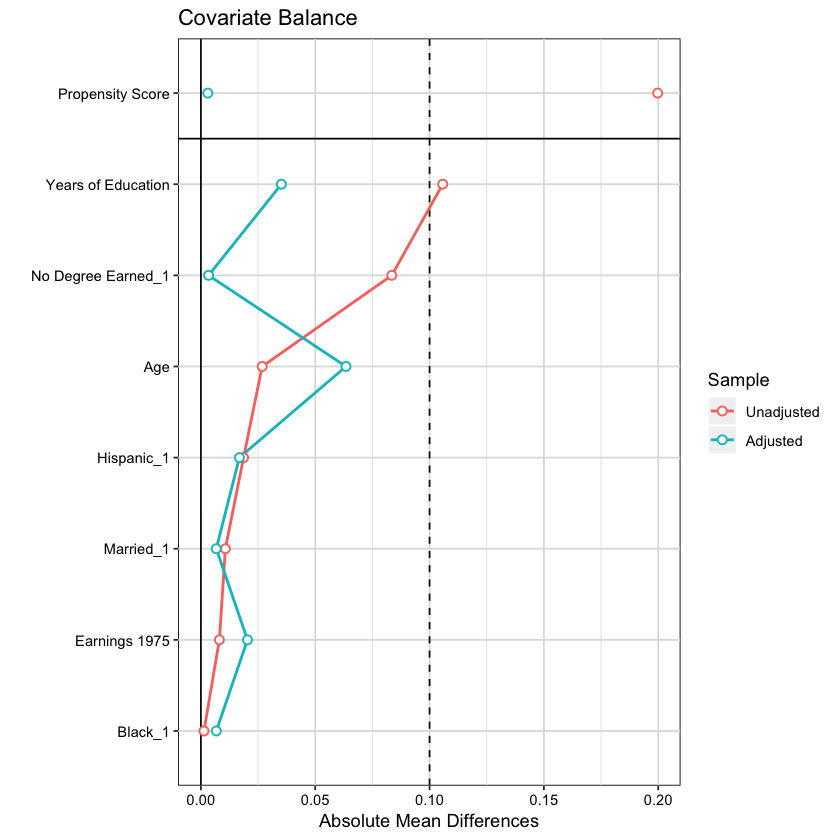

In [72]:
v = data.frame(old = c("age", "education", "black", "hispanic", 
                        "married", "nodegree", "re74", "re75", "distance"),
                new = c("Age", "Years of Education", "Black", 
                        "Hispanic",  "Married", "No Degree Earned", 
                        "Earnings 1974", "Earnings 1975", "Propensity Score"))

love.plot(bal.tab(m.out), stat = "mean.diffs", threshold = .1, 
          var.order = "unadjusted", var.names = v, abs = TRUE,
          line = TRUE)